In [ ]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the x0 and x1 data
x0 = np.loadtxt('/content/drive/MyDrive/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('/content/drive/MyDrive/linear_vectorfield_data_x1.txt')

delta_t = 0.1

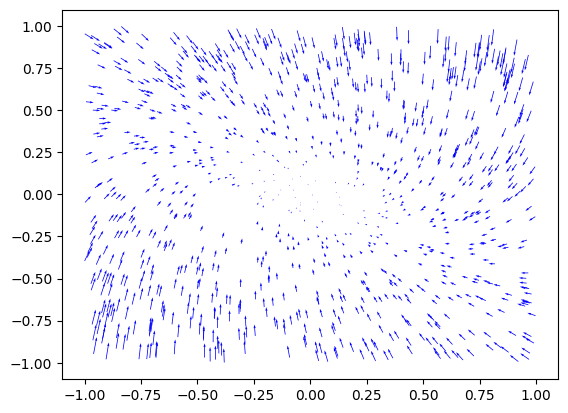

In [ ]:
x0x = x0[:, 0].T
x0y = x0[:, 1].T
x1x = x1[:, 0].T
x1y = x1[:, 1].T
# fig = plt.figure(figsize=(10,10))
plt.quiver(x0x,x0y,x1x-x0x,x1y-x0y, scale=4, color='blue', width=0.0015)

plt.show()


In [ ]:
x0.shape

(1000, 2)

In [ ]:
# Use the finite-difference formula

v_k = (x1 - x0) / delta_t
v_k

array([[ 0.18409949, -0.34489229],
       [ 0.40175684,  0.84220121],
       [ 0.15960619,  1.10825597],
       ...,
       [-0.3170126 , -0.17452792],
       [ 0.46427307, -0.33642386],
       [ 0.67015711, -0.42030566]])

In [ ]:
X = np.hstack([x0, np.ones((x0.shape[0], 1))])

# Solve for A using the normal equation: (X^T X)^(-1) X^T v
A_estimated = np.linalg.pinv(X.T @ X) @ X.T @ v_k

# Extract the 2x2 matrix part of A
A_matrix = A_estimated[:-1, :].T

A_matrix

array([[-0.49355245,  0.23191153],
       [-0.4638232 , -0.95737573]])

In [ ]:
from scipy.integrate import solve_ivp

# Function to describe the system of differential equations (dot{x} = Ax)
def system(t, x, A):
    return A @ x

# Time points (start at 0, end at delta_t)
t_span = (0, delta_t)
t_eval = np.linspace(t_span[0], t_span[1], 2)

# Solve the differential equation for each initial point x0(k)
x1_estimates = []
for x0_k in x0:
    sol = solve_ivp(system, t_span, x0_k, args=(A_matrix,), t_eval=t_eval, method='RK45')
    x1_estimates.append(sol.y[:, -1]) # Take the solution at the end time

# Convert the list of x1 estimates to a NumPy array
x1_estimates = np.array(x1_estimates)

# Calculate the Mean Squared Error (MSE) with the known x1 points
mse = np.mean((x1_estimates - x1)**2)

mse


4.978778569268735e-06

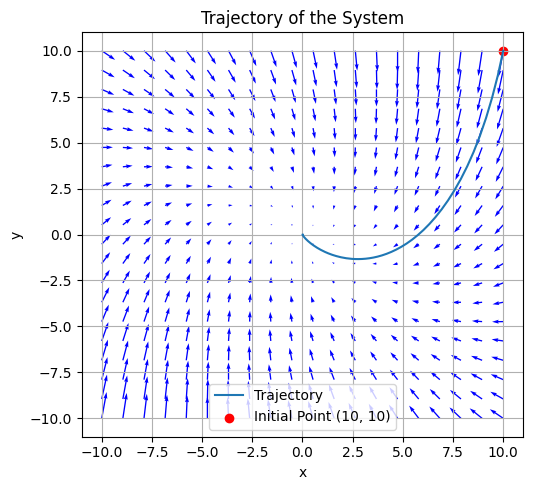

In [ ]:
import matplotlib.pyplot as plt

# Extended time span for T_end = 100
t_span_extended = (0, 100)
t_eval_extended = np.linspace(t_span_extended[0], t_span_extended[1], 1000)

# Initial point (10, 10)
initial_point = np.array([10, 10])

# Solve the differential equation for the initial point
sol_extended = solve_ivp(system, t_span_extended, initial_point, args=(A_matrix,), t_eval=t_eval_extended, method='RK45')

# Plot the trajectory
plt.figure(figsize=(10, 5))

# Trajectory plot
plt.subplot(1, 2, 1)
plt.plot(sol_extended.y[0], sol_extended.y[1], label='Trajectory')
X, Y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
U, V = A_matrix @ np.array([X.ravel(), Y.ravel()]).reshape(2, -1)
plt.quiver(X, Y, U, V, color='blue')
plt.scatter(10, 10, color='red', label='Initial Point (10, 10)')
plt.title('Trajectory of the System')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Phase portrait plot
# plt.subplot(1, 2, 2)
# X, Y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
# U, V = A_matrix @ np.array([X.ravel(), Y.ravel()]).reshape(2, -1)
# plt.quiver(X, Y, U, V, color='blue')
# plt.scatter(10, 10, color='red')
# plt.title('Phase Portrait')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.grid(True)

plt.tight_layout()
plt.show()
